<a href="https://colab.research.google.com/github/ChityalaRahul/23CSBTB39-40/blob/main/sml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 5.9229


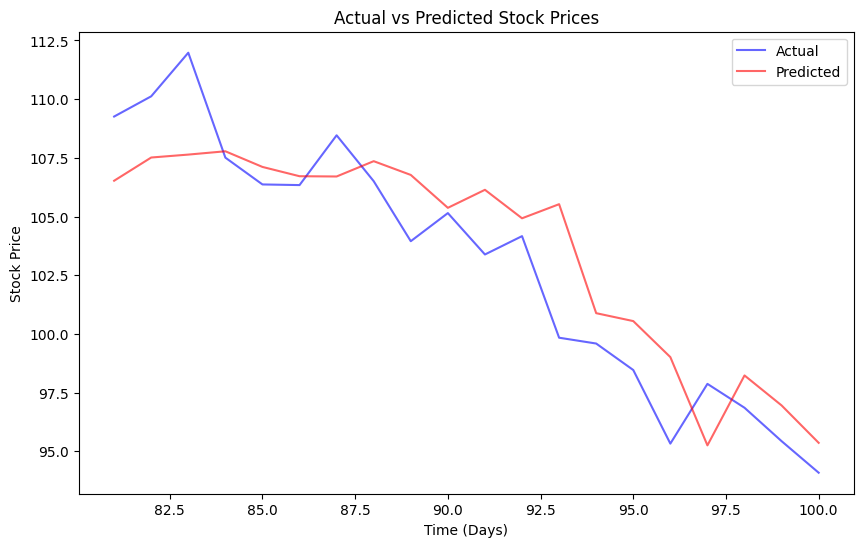

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 1. Generate synthetic stock market data
# Create a synthetic 'Close' price using a sine wave to simulate market fluctuations
np.random.seed(42)  # For reproducibility
time = np.arange(1, 101)  # Simulate 100 days of stock data
price = 100 + 10 * np.sin(0.1 * time) + np.random.normal(0, 2, size=len(time))  # Adding noise

# 2. Create a target variable 'Next_Close' (next day's closing price)
# Shift the 'price' by one to simulate predicting the next day's price
next_price = np.roll(price, -1)
next_price[-1] = np.nan  # The last value is NaN because there is no 'next day'

# 3. Define features (current day's 'price') and target ('Next_Close')
features = price[:-1].reshape(-1, 1)  # Use all but the last price for prediction
target = next_price[:-1]  # All but the last target value

# 4. Normalize features using StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

# 5. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# 6. Define the Gaussian Kernel function
def gaussian_kernel(x, x_i, bandwidth=1.0):
    """Gaussian kernel function for weighting the training points."""
    return np.exp(-np.linalg.norm(x - x_i) ** 2 / (2 * bandwidth ** 2))

# 7. Kernel Regression (Nadaraya-Watson Estimator)
def kernel_regression(X_train, y_train, X_test, bandwidth=1.0):
    """Kernel regression using the Nadaraya-Watson Estimator."""
    y_pred = []
    for x in X_test:
        # Compute the weights using the Gaussian kernel function
        weights = np.array([gaussian_kernel(x, x_i, bandwidth) for x_i in X_train])

        # Compute the weighted sum of the target values
        weighted_sum = np.dot(weights, y_train)
        weight_sum = np.sum(weights)

        # Predict the value as the weighted average
        y_pred.append(weighted_sum / weight_sum if weight_sum != 0 else 0)

    return np.array(y_pred)

# 8. Apply kernel regression to predict stock prices
bandwidth = 0.5  # Set the bandwidth for the Gaussian kernel
y_pred = kernel_regression(X_train, y_train, X_test, bandwidth)

# 9. Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

# 10. Plot Actual vs Predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(time[-len(y_test):], y_test, label='Actual', color='blue', alpha=0.6)
plt.plot(time[-len(y_pred):], y_pred, label='Predicted', color='red', alpha=0.6)
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time (Days)')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
